# Support Vector Machine (SVM) 
SVM is a supervised learning algorithm used mainly for classification. It finds an optimal hyperplane that separates different classes by maximizing the margin. SVM can handle complex datasets and uses the kernel trick to handle non-linear data. It is effective in high-dimensional spaces, avoids overfitting, but can be computationally expensive and is sensitive to hyperparameters. The original formulation of SVM is for binary classification, where it separates data into two classes by finding an optimal hyperplane that maximally separates the two classes. However, by using different strategies such as ensemble methods, SVM can be applied to multiclass classification.


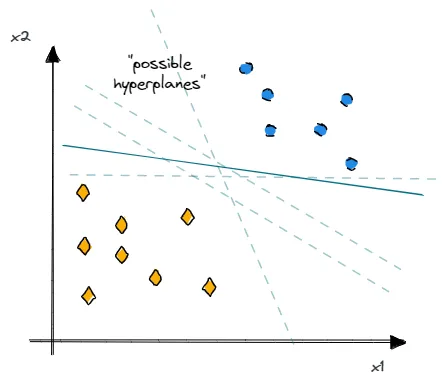
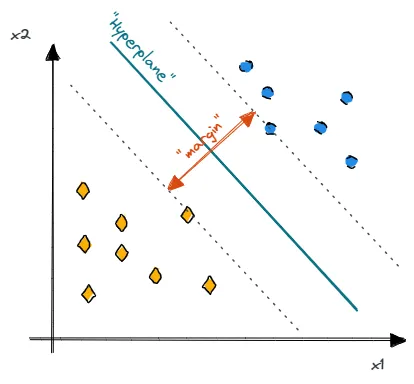

### Import libraries and initialize random generator

In [171]:
import numpy as np 
import pandas as pd  
import random
np.random.seed(0)

### Read data from CSV
This dataset contains 29 features and 1 output variable which is whether the cancer is benign or malignant


In [172]:
dataset = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
display(dataset)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Prepare dataset
We will map the output variable (benign vs malignant) to number of 1 and -1.
Also we will drop the unnecessary first column (id)

In [173]:
# convert benign to 1, malignant to -1
for i in range(len(dataset['diagnosis'])):
    if dataset['diagnosis'][i] == 'M':
        dataset['diagnosis'][i] = 1.0
    elif dataset['diagnosis'][i] == 'B':
        dataset['diagnosis'][i] = -1.0

# drop last column (extra column added by pd) and unnecessary first column (id)
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)
display(dataset)

/tmp/ipykernel_32/3439952038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['diagnosis'][i] = 1.0
/tmp/ipykernel_32/3439952038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['diagnosis'][i] = -1.0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


here we split the data into input variable (y) and output variables (X).

In [174]:
Y = dataset['diagnosis']  # all rows of 'diagnosis' 
X = dataset.iloc[:, 1:]  # all rows of column 1 and ahead 

In [175]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [176]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568   -1.0
Name: diagnosis, Length: 569, dtype: object

### Standardizing dataset values
We will standardize the values to ensure all variables have the same important, improve the speed of learning, and prevent numerical overflow

In [177]:
def min_max_scaler(X):
    X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
    return X_normalized

X = min_max_scaler(X.values)
display(X)

array([[4.22896098e-03, 2.44005642e-03, 2.88669488e-02, ...,
        6.23883404e-05, 1.08157029e-04, 2.79501646e-05],
       [4.83544899e-03, 4.17724495e-03, 3.12411848e-02, ...,
        4.37235543e-05, 6.46450400e-05, 2.09261871e-05],
       [4.62858486e-03, 4.99529854e-03, 3.05594734e-02, ...,
        5.71227080e-05, 8.49318289e-05, 2.05876822e-05],
       ...,
       [3.90220969e-03, 6.60084626e-03, 2.54583921e-02, ...,
        3.33333333e-05, 5.21391631e-05, 1.83826986e-05],
       [4.84250118e-03, 6.89468735e-03, 3.29337094e-02, ...,
        6.22943112e-05, 9.60742830e-05, 2.91490362e-05],
       [1.82416549e-03, 5.76868829e-03, 1.12646921e-02, ...,
        0.00000000e+00, 6.74894217e-05, 1.65467795e-05]])

In [178]:
# insert 1 in every row for intercept b (which is added as the last column)
X = np.insert(X, X.shape[1], 1, axis=1)
display(X)

array([[4.22896098e-03, 2.44005642e-03, 2.88669488e-02, ...,
        1.08157029e-04, 2.79501646e-05, 1.00000000e+00],
       [4.83544899e-03, 4.17724495e-03, 3.12411848e-02, ...,
        6.46450400e-05, 2.09261871e-05, 1.00000000e+00],
       [4.62858486e-03, 4.99529854e-03, 3.05594734e-02, ...,
        8.49318289e-05, 2.05876822e-05, 1.00000000e+00],
       ...,
       [3.90220969e-03, 6.60084626e-03, 2.54583921e-02, ...,
        5.21391631e-05, 1.83826986e-05, 1.00000000e+00],
       [4.84250118e-03, 6.89468735e-03, 3.29337094e-02, ...,
        9.60742830e-05, 2.91490362e-05, 1.00000000e+00],
       [1.82416549e-03, 5.76868829e-03, 1.12646921e-02, ...,
        6.74894217e-05, 1.65467795e-05, 1.00000000e+00]])

Split the dataset into training sets and testing sets

In [179]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, Y.to_numpy(), test_size=0.2)

## SVM algorithm
Our objective is to find a hyperplane that separates benign and malignant examples with the largest margin while keeping the misclassification as low as possible. The SVM model f(x) is then defined as shown below, where $\mathbf{w}$ (weights/normal) and $b$ (intercept) defines this hyperplane.


$$
    f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$$

where $\mathbf{w}$ is the weight vector, $\mathbf{x}$ is the input vector, and $b$ is the bias term.

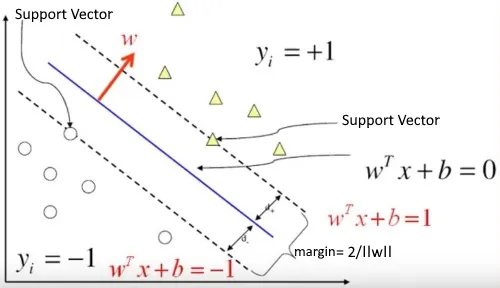


### Cost function
How does it find the optimal value of this hyperplane? The optimal values are found by minimizing a cost function, which measures how good/bad our model is doing at classification

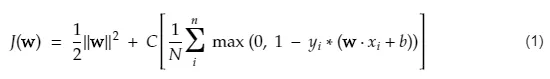

Our objective is to find a hyperplane that separates benign and malignant examples with the largest margin while keeping the misclassification as low as possible.

The C parameter is known as the regularization strength parameter or the penalty parameter. It determines the trade-off between maximizing the margin (distance between the decision boundary and the support vectors) and minimizing the classification error. A smaller value of C leads to a wider margin but may result in more misclassified training examples (allowing for more violations of the margin).
A larger value of C enforces stricter regularization, potentially leading to a narrower margin and fewer misclassifications on the training set, improving accuracy but potentially at the cost of overfitting

In [180]:
regularization_strength = 1000

def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)
    
    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

## Calculate gradient
To minimize the cost function, we need the gradient of the cost function in respect to the weights and biases. This lets us know how we should change the weights and biases so that the SVM can become less wrong.

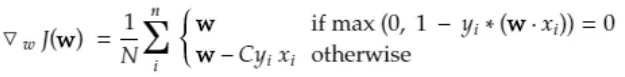

In [181]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    
    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))
    for i in range(len(distance)):
        d = distance[i]
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[i] * X_batch[i])
        dw += di

    dw = dw / len(Y_batch)  # average
    return dw


### Stochastic gradient descent
The idea of gradient descent is the exact same as seen previously in logistic regression and neural network:
1. Initialize the weights and biases with zeros
2. Find the gradient of cost function, ∇J(w’)
3. Move opposite to the gradient by a certain rate, w_new = w — ∝(∇J(w))
4. Repeat for as many times as time and computation resource permits, or until convergence

However, computing the gradient for EVERY image is often too slow. Therefore, we only use SOME subset of the dataset, which the exact amount is called the mini_batch_size. This is called stochastic gradient descent. 

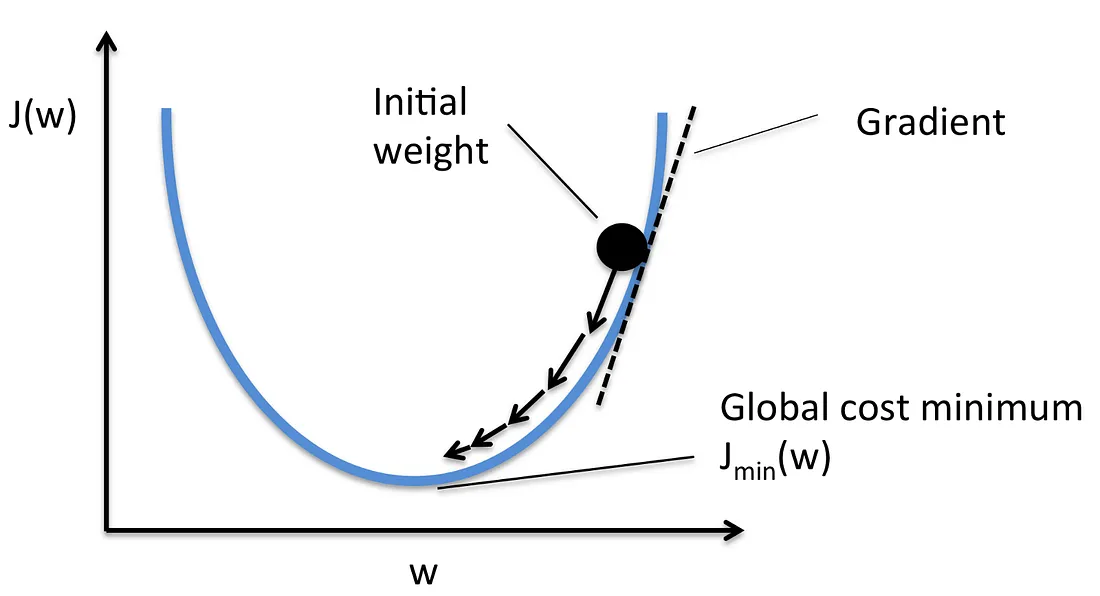



In [194]:
def sgd(features, outputs,mini_batch_size = 5):
    weights = np.zeros(features.shape[1])

    for epoch in range(2000): 
        # shuffle indices to prevent repeating update cycles
        indices = np.random.permutation(features.shape[0])
        X = features[indices]
        Y = outputs[indices]
        
        num_samples = len(X)
        for i in range(0, num_samples, mini_batch_size):
            X_batch = X[i:i+mini_batch_size]
            Y_batch = Y[i:i+mini_batch_size]

            ascent = calculate_cost_gradient(weights, X_batch, Y_batch)
            weights = weights - (learning_rate * ascent)
        
        if epoch%100==0: #run once every 100 epoch
            cost = compute_cost(weights, features, outputs)
            print("Epoch {} and cost = {}".format(epoch, cost))
            # stoppage criterion. Implement this for exercise 
    return weights


Now we combine everything together and run the SGD function. Note how the cost stops decreasing after a while

In [196]:
learning_rate = 0.000005
W = sgd(X_train, y_train)

Epoch 0 and cost = 964.8837319132738
Epoch 100 and cost = 498.1213574267646
Epoch 200 and cost = 390.2420467880606
Epoch 300 and cost = 354.1904229866104
Epoch 400 and cost = 340.9089962483754
Epoch 500 and cost = 335.7209986619737
Epoch 600 and cost = 332.66853901110966
Epoch 700 and cost = 330.2134193067975
Epoch 800 and cost = 328.6143937961524
Epoch 900 and cost = 327.3118613181152
Epoch 1000 and cost = 326.5256846377255
Epoch 1100 and cost = 326.1143993502998
Epoch 1200 and cost = 325.74870160518964
Epoch 1300 and cost = 325.41136928293747
Epoch 1400 and cost = 325.10527954155043
Epoch 1500 and cost = 324.8270155065734
Epoch 1600 and cost = 324.6197651882115
Epoch 1700 and cost = 324.4452416023784
Epoch 1800 and cost = 324.3023966329761
Epoch 1900 and cost = 324.2091985963203


In [ ]:
print("weights: ",W)

### Prediction
To make a prediction, we use the following equation:
$$
f(\mathbf{x}) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b) 
$$
Exercise problem 2: why is there no `b` in the code below?

In [199]:
def prediction(X, W):    
    predicted_y = np.dot(X, W)
    if predicted_y < 0:
        return -1
    else:
        return 1

### Evaluate accuracy

In [201]:
correct_prediction_count = 0
true_positives = 0
false_positives = 0
false_negatives = 0
test_dataset_size = X_test.shape[0]

for i in range(test_dataset_size):
    predicted_y = prediction(X_test[i], W)

    if predicted_y == y_test[i]:
        correct_prediction_count += 1
        if predicted_y == 1:
            true_positives += 1
    else:
        if predicted_y == 1:
            false_positives += 1
        else:
            false_negatives += 1

# Accuracy
accuracy = correct_prediction_count / test_dataset_size
print("Accuracy:", accuracy)

# Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

# Recall
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)


Accuracy: 0.8947368421052632
Precision: 0.972972972972973
Recall: 0.7659574468085106


### Exercise
1. How many numbers are there in the weights vector? (hint: we have 29 input variables and 1 output variable)
2. why is there no `b` in the prediction function?
3. In the above implementation of sgd() we are running the loop 2000 times (could have been any number). Each iteration costs us time and extra computations. We don’t need to complete all the iterations. We can terminate the loop when our stoppage criterion is met. Stop the training when the current cost hasn’t decreased, or only decreased a little bit (<5) compared to the previous cost. Implement this in the sgd() function



solution 
```
def sgd(features, outputs,mini_batch_size = 100):
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent

    weights = np.zeros(features.shape[1])

    for epoch in range(5000): 
        # shuffle indices to prevent repeating update cycles
        indices = np.random.permutation(features.shape[0])
        X = features[indices]
        Y = outputs[indices]
        
        num_samples = len(X)
        for i in range(len(X)):
            X_batch = X[i:i+mini_batch_size]
            Y_batch = Y[i:i+mini_batch_size]

            ascent = calculate_cost_gradient(weights, X_batch, Y_batch)
            weights = weights - (learning_rate * ascent)
        
        if epoch%100==0: #run once every 100 epoch
            cost = compute_cost(weights, features, outputs)
            print("Epoch is:{} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
    return weights
```

### References
- https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2
- https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a